# **ACML Assignment 1 - Backpropagation**
### Jean Janssen, Florent Didascalou

In [21]:
import numpy as np
import matplotlib.pyplot as plt

## ANN Class

In [27]:
class Ann:

    def __init__(self, layers, learning_rate):
        self.hidden_weights = np.random.random((layers[0], layers[1]))
        self.hidden_bias = np.random.random((1,layers[1]))
        self.output_weights = np.random.random((layers[1], layers[2]))
        self.output_bias = np.random.random((1,layers[2]))
        self.alpha = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, input):
        hidden_act = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
        return self.sigmoid(np.matmul(hidden_act, self.output_weights) + self.output_bias)
    
    def backprop(self, data, epochs):
        loss_history = list() # History of Losses for each training epoch
        n = len(data) # Number of training samples
        input = data

        for epoch in range(epochs):
            cumulative_loss = 0
            
            # Calculating activations for each layer
            hidden_activation = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
            output_activation = self.sigmoid(np.matmul(hidden_activation, self.output_weights) + self.output_bias)

            # Calculating Loss for the epoch
            loss = output_activation - input
            cumulative_loss += np.sum(np.abs(loss)) / n

            # Calculating Deltas for both layers
            delta_out = output_activation * (1- output_activation) * loss

            delta_hidden = hidden_activation * (1- hidden_activation) * (np.matmul(delta_out, self.hidden_weights))


            # Updating the weights
            self.output_weights -= self.alpha * (1/n) * np.dot(np.transpose(hidden_activation), delta_out)
            self.hidden_weights -= self.alpha * (1/n) * np.dot(np.transpose(input), delta_hidden)

            self.output_bias -= self.alpha * (1/n) * np.sum(delta_out, axis=0)
            self.hidden_bias -= self.alpha * (1/n) * np.sum(delta_hidden, axis=0)

            
            if epoch % 5000 == 0:
                print(f"Current epoch: {epoch}, cumulative loss: {cumulative_loss}")
            loss_history.append(cumulative_loss)

        

        return loss_history


In [18]:
data = np.array([[1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1]])

learning_rate = 3
epochs = 100000
Ann_structure = [8, 3, 8]

## Model Training

In [32]:
my_network = Ann(Ann_structure, learning_rate)

loss_hist = my_network.backprop(data, epochs)

Current epoch: 0, cumulative loss: 5.994650249563086
Current epoch: 5000, cumulative loss: 0.17332286790956364
Current epoch: 10000, cumulative loss: 0.11655196572315724
Current epoch: 15000, cumulative loss: 0.09328593087831946
Current epoch: 20000, cumulative loss: 0.0798848720696734
Current epoch: 25000, cumulative loss: 0.07092374753779392
Current epoch: 30000, cumulative loss: 0.06439949391838314
Current epoch: 35000, cumulative loss: 0.05937982980282941
Current epoch: 40000, cumulative loss: 0.05536504037627385
Current epoch: 45000, cumulative loss: 0.05206025315086191
Current epoch: 50000, cumulative loss: 0.049278859192539236
Current epoch: 55000, cumulative loss: 0.04689629240758867
Current epoch: 60000, cumulative loss: 0.044825827854296646
Current epoch: 65000, cumulative loss: 0.043004993264039885
Current epoch: 70000, cumulative loss: 0.04138750096005403
Current epoch: 75000, cumulative loss: 0.039938232807222224
Current epoch: 80000, cumulative loss: 0.038630001170352875


## Results

Last epoch training loss: 0.03443758937479747
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.99  0.    0.003 0.007 0.001 0.    0.008 0.   ]
 [0.    0.99  0.    0.004 0.    0.009 0.008 0.004]
 [0.005 0.    0.987 0.    0.009 0.    0.007 0.009]
 [0.008 0.006 0.    0.99  0.005 0.007 0.    0.   ]
 [0.004 0.    0.011 0.001 0.987 0.011 0.    0.   ]
 [0.    0.007 0.    0.007 0.008 0.982 0.    0.008]
 [0.005 0.005 0.005 0.    0.    0.    0.988 0.   ]
 [0.    0.003 0.005 0.    0.    0.006 0.004 0.992]
 [0.    0.003 0.005 0.    0.    0.006 0.004 0.992]]


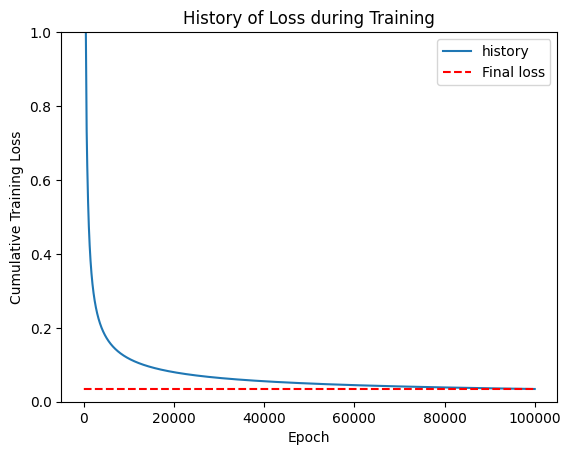

In [36]:
final_output = my_network.feedforward(data)

print(f"Last epoch training loss: {loss_hist[-1]}")

print("Training Set")
print(data)

print("Predictions of Trained Model on Training Set:")
print(np.round(final_output, 3))

plt.figure()
plt.plot(np.arange(epochs), loss_hist, label="history")
plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
plt.ylim(0,1)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cumulative Training Loss")
plt.title("History of Loss during Training")
plt.show()

## Experiments